In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load CSV file
df = pd.read_csv("Car_dataset.csv")
print(df)

         Car_Name      Brand Fuel_Type Transmission   Car_Type  Engine(CC)  \
0   Chevrolet 535       Ford  Electric    Automatic      Sedan      2363.0   
1             NaN        NaN  Electric       Manual      Coupe      2981.0   
2       Honda 714     Nissan  Electric       Manual      Coupe      2354.0   
3         Kia 566        Kia       NaN       Manual        SUV         NaN   
4   Chevrolet 430       Audi    Hybrid       Manual      Sedan      2529.0   
5    Mercedes 472     Nissan  Electric       Manual  Hatchback      3038.0   
6        Audi 971        NaN       NaN       Manual  Hatchback      2496.0   
7    Mercedes 230        Kia    Petrol    Automatic      Sedan      3237.0   
8      Nissan 408       Ford  Electric       Manual  Hatchback      2408.0   
9        Ford 443        NaN    Petrol          NaN  Hatchback         NaN   
10     Nissan 485       Audi    Diesel       Manual      Sedan      2306.0   
11      Honda 260   Mercedes       NaN    Automatic      Coupe  

In [2]:
# Step 2: First data inspection
print("Head")
print(df.head())
print("\nTail")
print(df.tail())
print("\nInfo")
print(df.info())
print("\nDescribe")
print(df.describe())

Head
        Car_Name   Brand Fuel_Type Transmission Car_Type  Engine(CC)  \
0  Chevrolet 535    Ford  Electric    Automatic    Sedan      2363.0   
1            NaN     NaN  Electric       Manual    Coupe      2981.0   
2      Honda 714  Nissan  Electric       Manual    Coupe      2354.0   
3        Kia 566     Kia       NaN       Manual      SUV         NaN   
4  Chevrolet 430    Audi    Hybrid       Manual    Sedan      2529.0   

   Horsepower  Mileage(kmpl)  Price($)  
0       121.0           17.1   35932.0  
1       337.0           24.8   44855.0  
2         NaN           16.0   76434.0  
3       182.0           22.2   87694.0  
4       170.0           22.0   58016.0  

Tail
        Car_Name     Brand Fuel_Type Transmission Car_Type  Engine(CC)  \
25      Ford 439   Hyundai    Hybrid       Manual      SUV      2631.0   
26           NaN  Mercedes    Petrol          NaN      NaN      2495.0   
27  Mercedes 134    Toyota  Electric       Manual    Coupe      2136.0   
28    Toyota 6

In [3]:
# Step 3: Handle Missing Values
if df.isnull().sum().sum() > 0:
    print("\nMissing values detected. Performing imputation")
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())
else:
    print("\nNo missing values detected. Randomly dropping 10% of rows.")
    df = df.sample(frac=0.9, random_state=42)
    df = df.reset_index(drop=True)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())
print("\n Data cleaned successfully.")
display(df.head())


Missing values detected. Performing imputation

 Data cleaned successfully.


,Car_Name,Brand,Fuel_Type,Transmission,Car_Type,Engine(CC),Horsepower,Mileage(kmpl),Price($)
0,Chevrolet 535,Ford,Electric,Automatic,Sedan,2363.000000,121.00000,17.1,35932.0
1,Audi 971,Mercedes,Electric,Manual,Coupe,2981.000000,337.00000,24.8,44855.0
2,Honda 714,Nissan,Electric,Manual,Coupe,2354.000000,239.62963,16.0,76434.0
3,Kia 566,Kia,Electric,Manual,SUV,2458.962963,182.00000,22.2,87694.0
4,Chevrolet 430,Audi,Hybrid,Manual,Sedan,2529.000000,170.00000,22.0,58016.0


In [4]:
import numpy as np
import pandas as pd

# Step 3: Handle Missing Values
total_missing = df.isnull().sum().sum()

if total_missing > 0:
    print("\nMissing values detected. Performing imputation.")
    df_filled = df.copy()
    
    for col in df_filled.columns:
        mask = df_filled[col].isnull()  # True where value is missing
        if df_filled[col].dtype == 'object':
            mode_val = df_filled[col].mode()[0]
            df_filled[col] = df_filled[col].mask(mask, mode_val)
        else:
            mean_val = df_filled[col].mean()
            df_filled[col] = df_filled[col].mask(mask, mean_val)
    
else:
    print("\nNo missing values detected. Randomly dropping 10% of rows.")
    # Create a mask to drop 10% of rows
    drop_mask = np.random.rand(len(df)) < 0.1
    df_filled = df[~drop_mask].copy()
    
    # Fill any remaining missing values (just in case)
    for col in df_filled.columns:
        mask = df_filled[col].isnull()
        if df_filled[col].dtype == 'object':
            mode_val = df_filled[col].mode()[0]
            df_filled[col] = df_filled[col].mask(mask, mode_val)
        else:
            mean_val = df_filled[col].mean()
            df_filled[col] = df_filled[col].mask(mask, mean_val)



No missing values detected. Randomly dropping 10% of rows.


C:\Users\arpit\AppData\Local\Temp\ipykernel_17020\954929235.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand', y='Price($)', palette='viridis')


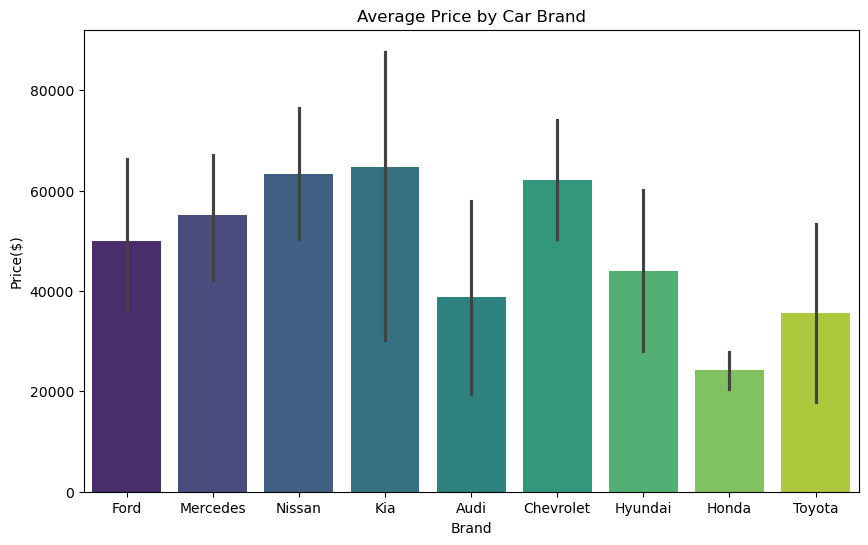

In [5]:
# Step 4: Draw individual plots using seaborn
# barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Brand', y='Price($)', palette='viridis')
plt.title("Average Price by Car Brand")
plt.show()

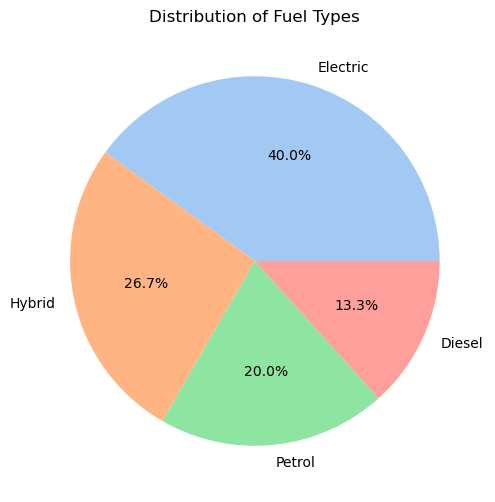

In [6]:
# Pie Chart (using matplotlib for categorical data)
plt.figure(figsize=(6,6))
df['Fuel_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribution of Fuel Types")
plt.ylabel('')
plt.show()

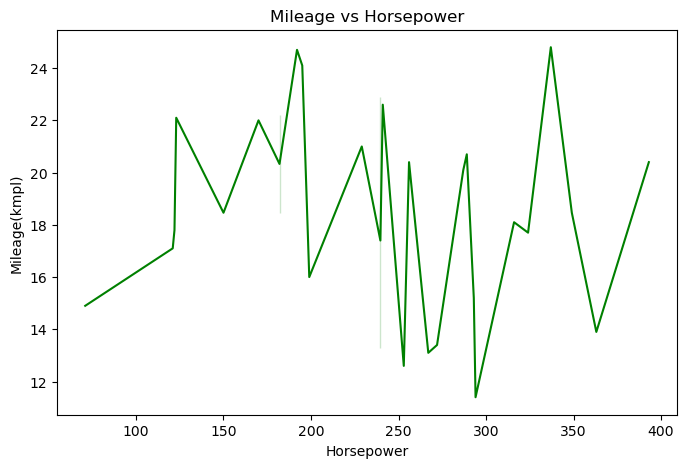

In [7]:
# Line Chart (Mileage vs Horsepower)
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Horsepower', y='Mileage(kmpl)', color='green')
plt.title("Mileage vs Horsepower")
plt.show()

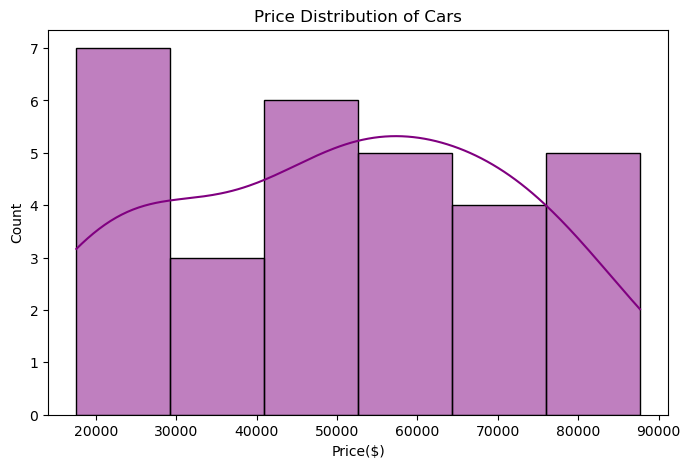

In [8]:
# Histogram (Price Distribution)
plt.figure(figsize=(8,5))
sns.histplot(df['Price($)'], kde=True, color='purple')
plt.title("Price Distribution of Cars")
plt.show()

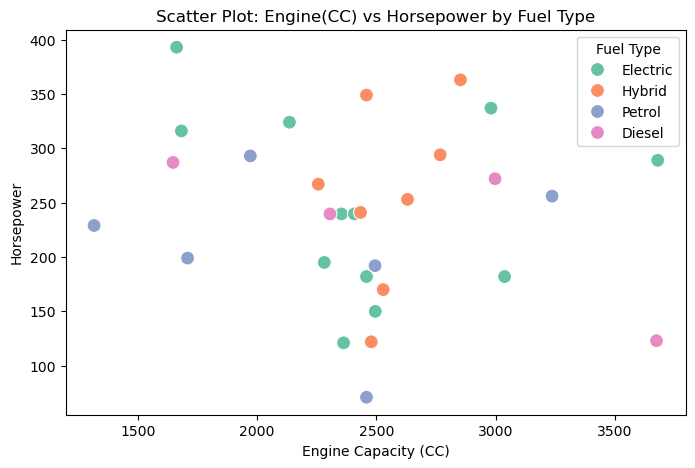

In [9]:
#Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Engine(CC)', y='Horsepower', hue='Fuel_Type', palette='Set2', s=100)
plt.title("Scatter Plot: Engine(CC) vs Horsepower by Fuel Type")
plt.xlabel("Engine Capacity (CC)")
plt.ylabel("Horsepower")
plt.legend(title="Fuel Type")
plt.show()

C:\Users\arpit\AppData\Local\Temp\ipykernel_17020\1894808467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Car_Type', y='Price($)', palette='cool')


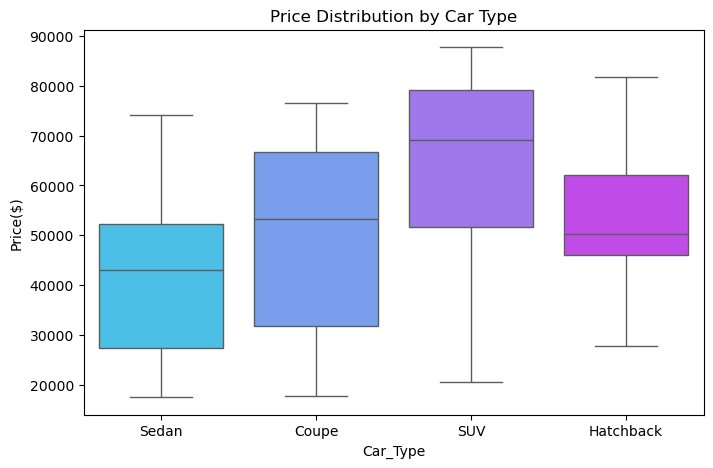

In [10]:
# Boxplot (Engine vs Price)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Car_Type', y='Price($)', palette='cool')
plt.title("Price Distribution by Car Type")
plt.show()

C:\Users\arpit\AppData\Local\Temp\ipykernel_17020\1393767007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Brand', y='Price($)', ax=axes[0,0], palette='coolwarm')


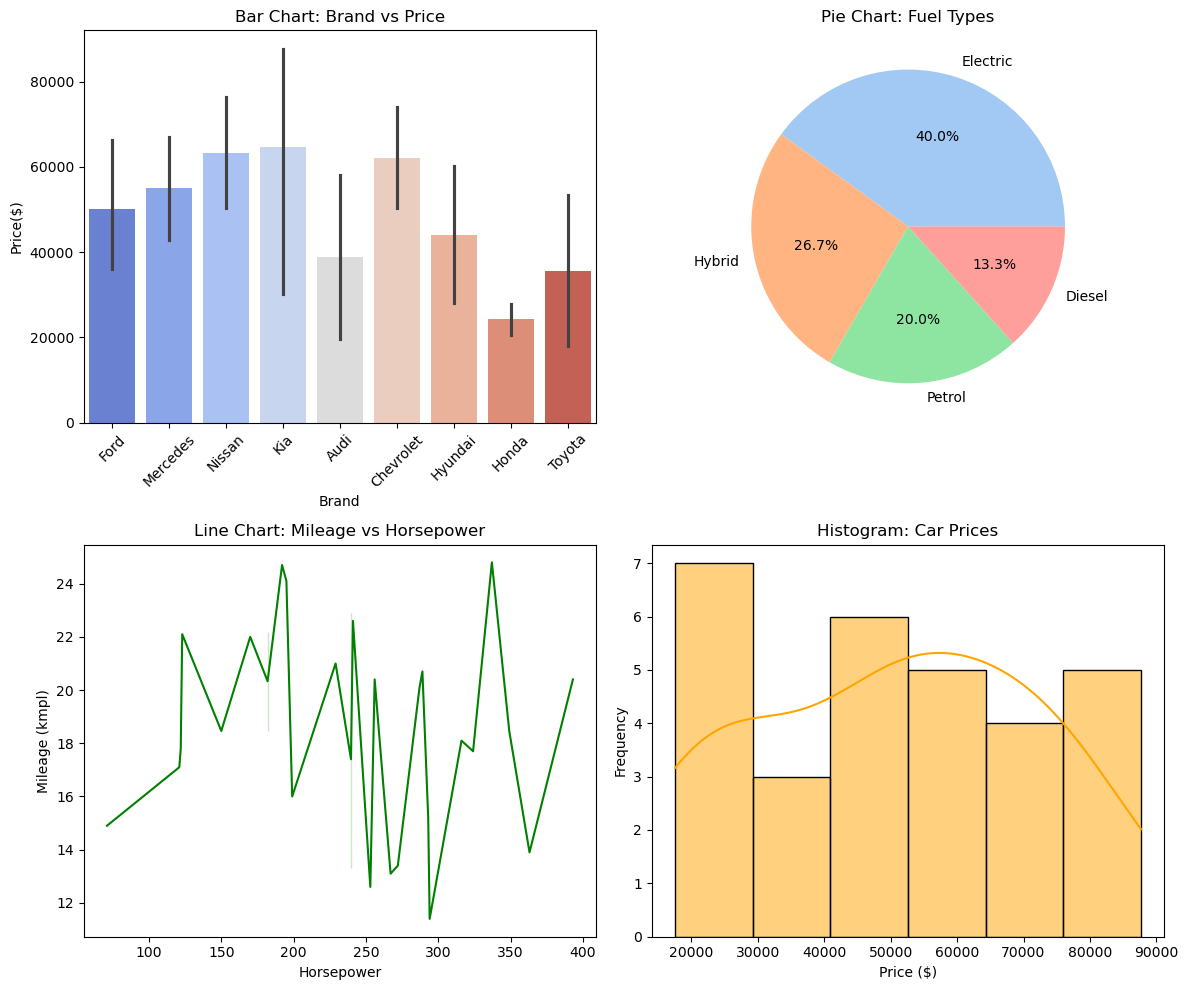

In [11]:
# Step 6: 2x2 Subplot
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.barplot(data=df, x='Brand', y='Price($)', ax=axes[0,0], palette='coolwarm')
axes[0,0].set_title("Bar Chart: Brand vs Price")
axes[0,0].tick_params(axis='x', rotation=45)

df['Fuel_Type'].value_counts().plot.pie(ax=axes[0,1], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[0,1].set_title("Pie Chart: Fuel Types")
axes[0,1].set_ylabel("")

sns.lineplot(data=df, x='Horsepower', y='Mileage(kmpl)', ax=axes[1,0], color='green')
axes[1,0].set_title("Line Chart: Mileage vs Horsepower")
axes[1,0].set_xlabel("Horsepower")
axes[1,0].set_ylabel("Mileage (kmpl)")

sns.histplot(df['Price($)'], kde=True, ax=axes[1,1], color='orange')
axes[1,1].set_title("Histogram: Car Prices")
axes[1,1].set_xlabel("Price ($)")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
